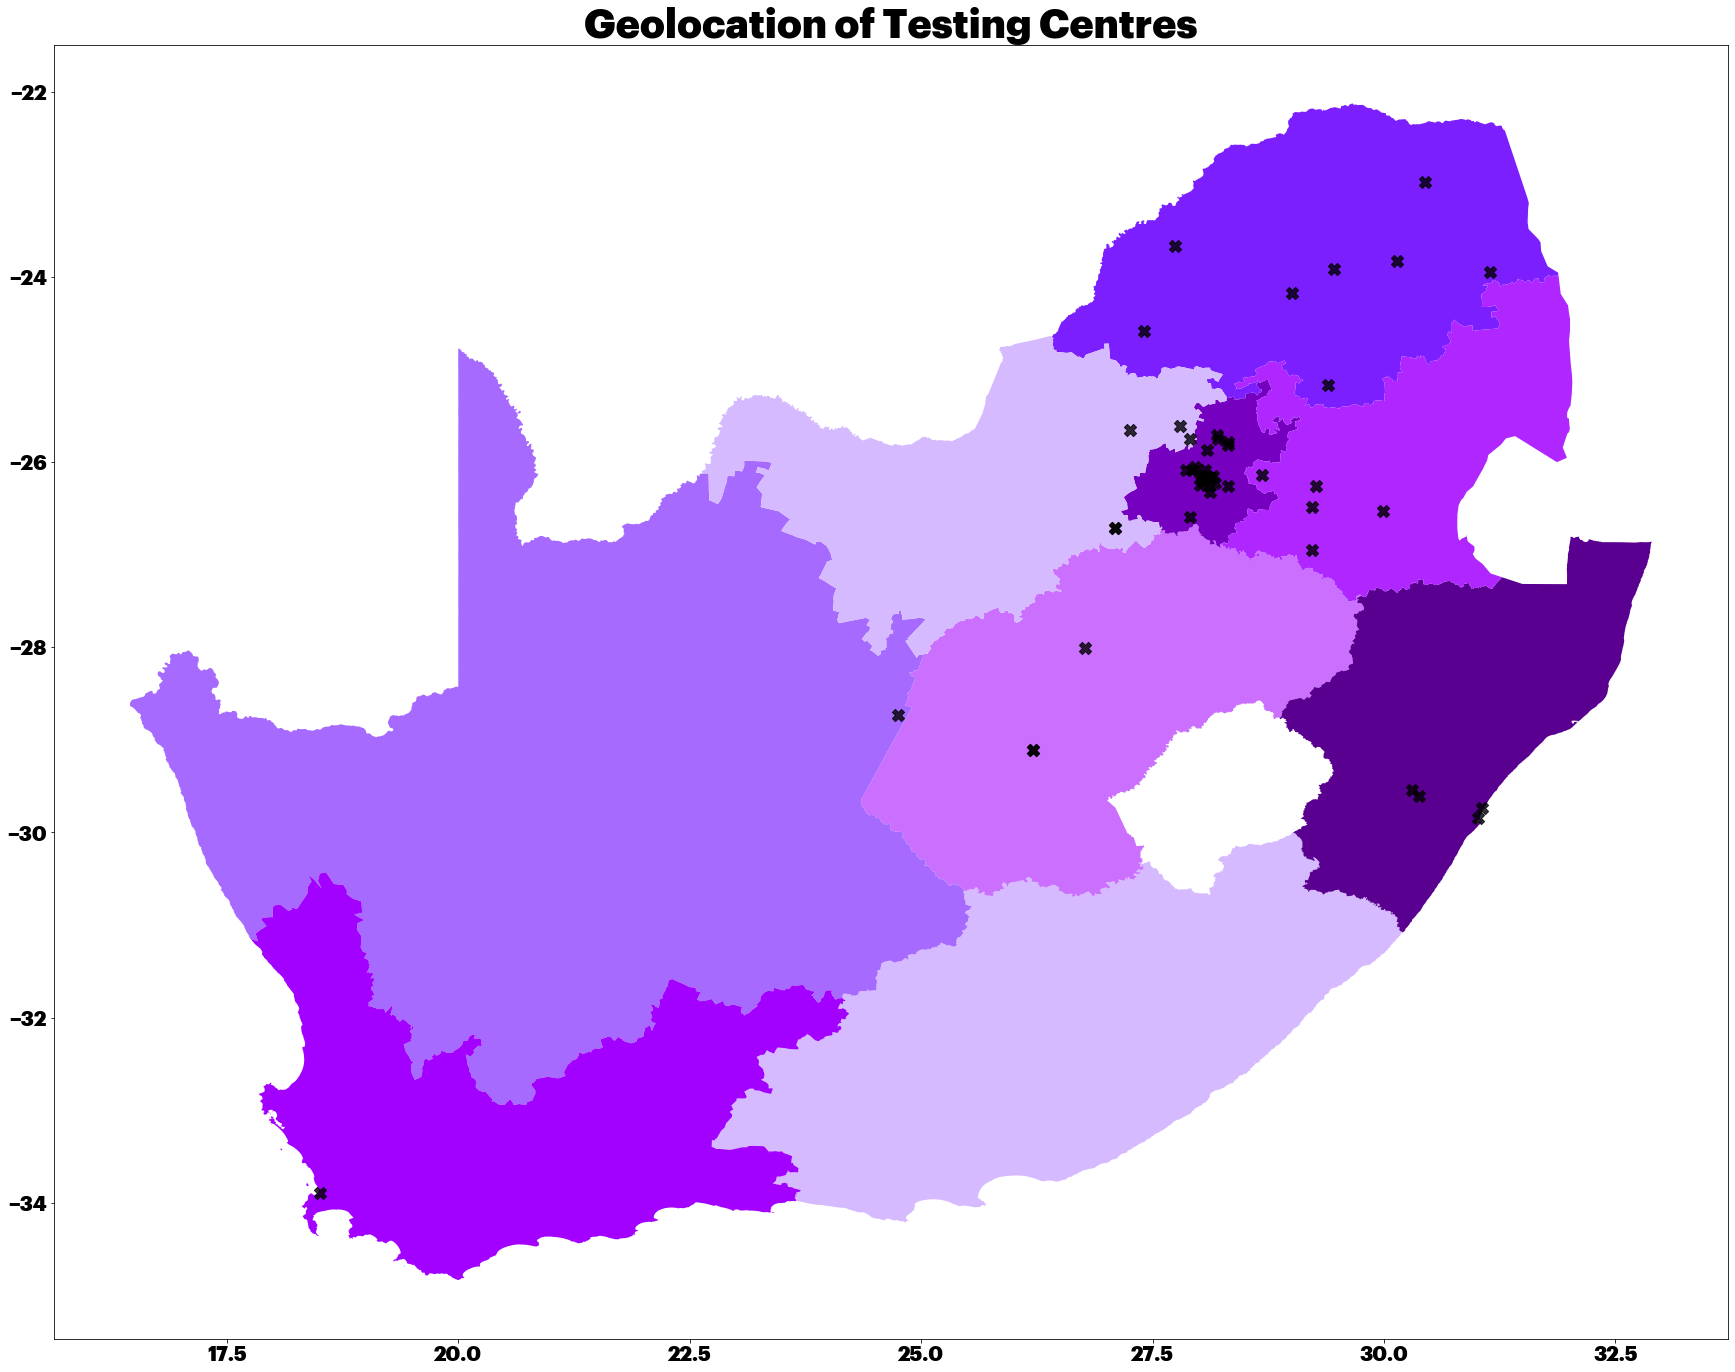

In [25]:
#This file takes the latitude and logitude generated in TestingCentresGeocode and maps it
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point, Polygon

#read latitude and longitude from collected data
df=pd.read_csv('testingCentres_latlong.csv')

spatial_data =df[['Latitude', 'Longitude']]

#read shape file in (map of South Africa with coordinates)
street_map = gpd.read_file('South_Africa_Polygon.shp')
crs = {'init':'espc:4326'}

#create xy points to plot
geometry = [Point(xy) for xy in zip(spatial_data['Longitude'],spatial_data['Latitude'])]

#create a geopandas dataframe
geo_df = gpd.GeoDataFrame(spatial_data,crs = crs,geometry = geometry)
       
#Start Plotting
fig, ax = plt.subplots(figsize=(30,30))

#Plot SA map first
street_map.plot(ax=ax, color= ["#d6baff","#cb6fff","#7600c0","#590090","#7c1fff","#af26ff" ,"#a76aff","#d6baff","#a200ff"])

#Plot markers
geo_df.plot(ax=ax,alpha=0.8,legend=True,markersize=150,color='black', marker="X")

#Graph formatting
plt.rcParams['font.family'] = 'Graphik'   
plt.xticks(fontweight='black',fontsize= 20)
plt.yticks(fontweight='black',fontsize= 20)
plt.title('Geolocation of Testing Centres',fontsize= 40,fontweight='black')
plt.rcParams['axes.linewidth']=1

#Save figure
plt.savefig('GeolocationOfTestingCentres4.png',pad_inches=0,bbox_inches='tight')

#Plot map
plt.show()